<a href="https://colab.research.google.com/github/vicentemf/Mercado-Financeiro/blob/main/simula%C3%A7%C3%A3o_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   #A simulação de Monte Carlo começou a ser desenvolvida pelo matemático  Stanislaw Ulam que se interessou por traçar possíveis resultados de um jogo de cartas, modelando sua distribuição e probabilidade de ganhar.Depois que ele compartilhou sua ideia com o matemático John Von Neumann, os dois colaboraram para desenvolver a simulação de Monte Carlo.

   #A simulação de Monte Carlo é comum em análises de mercado, sendo muito usada, por exemplo, para se estimar resultados futuros de um projetos, investimentos ou negócios.São feitas diversas simulações para calcular probabilidades de ganhos e perdas .

  #A grande vantagem de utilizar a simulação através da linguagem Python e não no excel(que é o caminho mais tradicional) é que podemos processar muito mais dados em menos tempo,uma simulação como a que eu iremos ver por exemplo seria algo dificílimo(e demorado) de gerenciar através do Excel .

In [ ]:
!pip install yfinance #biblioteca para extrair dados do Yahoo Finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#bibliotecas que iremos utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt



   #Abaixo podemos montar nossa carteira e escolher a série temporal desejada.Os dados da yahoo finance vem em formato de OLHC, carregarei apenas a coluna de fechamento ajustado que é a que interessa para nosso objetivo.


In [ ]:
carteira=["BBDC4.SA","ABEV3.SA","PETR4.SA","EQTL3.SA"]
inicio="2012-01-01"
fim="2022-01-01"

In [ ]:
cotacao=pd.DataFrame() #dataframe que será completado com os dados

In [ ]:
for i in carteira:
  cotacao[i]=yf.download(i,inicio,fim)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


   #Gosto de aplicar uma rotina para checar se estes dados nulos são existentes,e,caso sejam,retirá-los .

In [ ]:
cotacao.info() #checando dados nulos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2480 entries, 2012-01-02 to 2021-12-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBDC4.SA  2479 non-null   float64
 1   ABEV3.SA  2479 non-null   float64
 2   PETR4.SA  2479 non-null   float64
 3   EQTL3.SA  2479 non-null   float64
dtypes: float64(4)
memory usage: 96.9 KB


In [ ]:
cotacao.dropna(inplace=True),cotacao.info() #retirando 1 dado nulo

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2479 entries, 2012-01-02 to 2021-12-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBDC4.SA  2479 non-null   float64
 1   ABEV3.SA  2479 non-null   float64
 2   PETR4.SA  2479 non-null   float64
 3   EQTL3.SA  2479 non-null   float64
dtypes: float64(4)
memory usage: 96.8 KB


(None, None)

In [ ]:
cotacao #visualização dos dados

,BBDC4.SA,ABEV3.SA,PETR4.SA,EQTL3.SA
Date,,,,
2012-01-02,7.002318,7.493659,12.077705,2.073644
2012-01-03,7.154253,7.408256,12.558116,2.026442
2012-01-04,7.165658,7.236069,12.647777,2.058995
2012-01-05,7.120036,7.092808,12.502075,2.067133
2012-01-06,7.209008,7.074901,12.513285,2.075272
...,...,...,...,...
2021-12-23,17.196686,15.550000,23.237991,22.084633
2021-12-27,17.393320,15.530000,23.582502,22.240639
2021-12-28,17.330751,15.520000,23.607111,22.250389


   #Para efetuar a simulação precisamos saber como funcionou o retorno do papel. O método pct_change calcula o retorno levando em consideração o dia anterior . Sendo assim, a primeira linha será nula e as próximas serão o retorno em relação ao dia anterior.

In [ ]:
retorno=cotacao.pct_change()

In [ ]:
retorno.head()

,BBDC4.SA,ABEV3.SA,PETR4.SA,EQTL3.SA
Date,,,,
2012-01-02,NaN,NaN,NaN,NaN
2012-01-03,0.021698,-0.011397,0.039777,-0.022763
2012-01-04,0.001594,-0.023242,0.007140,0.016064
2012-01-05,-0.006367,-0.019798,-0.011520,0.003952
2012-01-06,0.012496,-0.002525,0.000897,0.003938


In [ ]:
retorno=retorno.iloc[1:] #excluindo a linha sem dados

In [ ]:
retorno.head()

,BBDC4.SA,ABEV3.SA,PETR4.SA,EQTL3.SA
Date,,,,
2012-01-03,0.021698,-0.011397,0.039777,-0.022763
2012-01-04,0.001594,-0.023242,0.007140,0.016064
2012-01-05,-0.006367,-0.019798,-0.011520,0.003952
2012-01-06,0.012496,-0.002525,0.000897,0.003938
2012-01-09,0.002532,-0.001947,0.013435,0.000000


#Como a simulação tem fins educacionais,utilizarei uma média de 250 dias úteis para calcular o retorno anual do papel,entretanto,para uma melhor precisão é  necessário verificar quantos pregões foram realizados no intervalo de tempo desejado .

In [ ]:
retorno_anual=retorno.mean()*250

In [ ]:
retorno_anual

BBDC4.SA    0.151959
ABEV3.SA    0.108833
PETR4.SA    0.188933
EQTL3.SA    0.276023
dtype: float64

 #  A covariância é definida entre um par de variáveis em que uma mudança em uma variável é retribuída com uma mudança equivalente na outra variável.
   
#   Trazendo este conceito estatístico para as finanças,podemos entender o quanto nossos papéis se relacionam.
 


In [ ]:
covariancia=retorno.cov()

In [ ]:
covariancia

,BBDC4.SA,ABEV3.SA,PETR4.SA,EQTL3.SA
BBDC4.SA,0.000493,0.000175,0.000428,0.000161
ABEV3.SA,0.000175,0.000288,0.000188,0.000094
PETR4.SA,0.000428,0.000188,0.000968,0.000198
EQTL3.SA,0.000161,0.000094,0.000198,0.000299


In [ ]:
covariancia_anual=covariancia * 250

In [ ]:
covariancia_anual

,BBDC4.SA,ABEV3.SA,PETR4.SA,EQTL3.SA
BBDC4.SA,0.123140,0.043676,0.107049,0.040174
ABEV3.SA,0.043676,0.071972,0.046986,0.023615
PETR4.SA,0.107049,0.046986,0.241962,0.049575
EQTL3.SA,0.040174,0.023615,0.049575,0.074837


#   Aqui começa a nossa simulação de Monte Carlo, inicialmente iremos definir quantas simulações de previsões queremos e utilizaremos a " random" para definir aleatóriamente quais serão os pesos de cada ação na nossa carteira em cada uma das simulações .

In [ ]:
retorno_do_portfolio=[]
volatilidade_portfolio=[]
peso_acoes=[]

In [ ]:
numero_acoes = len(carteira) #numero de ações da carteira

numero_portfolios= 200000 #simulações desejadas

#A idéia agora é preencher as listas criadas inicialmente com os dados de retornos,pesos(criados aleatoriamente) e volatilidade, por fim criar um dataframe que nos mostre tudo isso.



In [ ]:
for single_portfolio in range(numero_portfolios):
  weights = np.random.random(numero_acoes) #distribui pesos aleatórios entre as ações da carteira
  weights/= np.sum( weights) #comando para garantir que a soma dos pesos não ultrapasse 1.
  returns= np.dot(weights,retorno_anual) #calculo dos retorno anual
  volatility = np.sqrt(np.dot(weights.T,np.dot(covariancia_anual,weights))) #calculo da volatilidade esperada
  retorno_do_portfolio.append(returns)
  volatilidade_portfolio.append(volatility)
  peso_acoes.append(weights)



In [ ]:
portfolio={"Retornos":retorno_do_portfolio,"Volatilidade":volatilidade_portfolio} #renomeando as colunas

In [ ]:
for counter,symbol in enumerate(carteira):
  portfolio[symbol +  "peso"] = [weight[counter] for weight in peso_acoes]  #montagem do DataFrame

In [ ]:
df = pd.DataFrame(portfolio)

In [ ]:
df.head()

,Retornos,Volatilidade,BBDC4.SApeso,ABEV3.SApeso,PETR4.SApeso,EQTL3.SApeso
0,0.167290,0.261908,0.382358,0.287683,0.151546,0.178413
1,0.174917,0.270411,0.161102,0.326688,0.304284,0.207926
2,0.176355,0.281313,0.226169,0.262049,0.319171,0.192611
3,0.178272,0.282131,0.259880,0.231876,0.307062,0.201181
4,0.211378,0.254208,0.258707,0.111241,0.160186,0.469867


#   Com os 200.000 mil portfólios criados,podemos começar diversas análises.
#   Aqui vou focar no portfólio que teve maior e menor retorno(melhor cenário e pior cenário)e extrair seus dados,descobrir como essas carteiras foram formadas  em relação a distribuição de pesos,como se deu o retorno dela na nossa série temporal e por fim compará-las ao IBOV .

In [ ]:
df.shape #conferindo se foram criados 200.000 portfólios

(200000, 6)

In [ ]:
retornos =df.sort_values(by=["Retornos"],ascending=False) #ordenando os retornos do maior para o menor

In [ ]:
retornos.head()

,Retornos,Volatilidade,BBDC4.SApeso,ABEV3.SApeso,PETR4.SApeso,EQTL3.SApeso
38670,0.272544,0.269758,0.000155,0.017947,0.005267,0.976631
124734,0.269387,0.268735,0.000784,0.000137,0.074816,0.924263
105635,0.268431,0.266207,0.048221,0.008233,0.002680,0.940866
88454,0.267973,0.266340,0.023487,0.007478,0.044612,0.924422
91354,0.266682,0.265786,0.008550,0.013588,0.068990,0.908872


In [ ]:
retorno_max=retornos.iloc[:1] #selecionando o maior retorno

In [ ]:
alocacao_carteira = retorno_max.drop(["Retornos","Volatilidade"],axis=1) #retirando colunas que não são da composição da carteira

In [ ]:
alocacao_carteira #configuração da carteira com maior retorno

,BBDC4.SApeso,ABEV3.SApeso,PETR4.SApeso,EQTL3.SApeso
38670,0.000155,0.017947,0.005267,0.976631


In [ ]:
pesos=np.array(alocacao_carteira) #transformando em um array

In [ ]:
pesos #conferindo

array([[1.55136116e-04, 1.79467237e-02, 5.26723568e-03, 9.76630904e-01]])

In [ ]:
retorno_carteira = retorno * pesos 


In [ ]:
retorno_carteira=retorno_carteira.sum(axis=1) #somando os retornos por linha

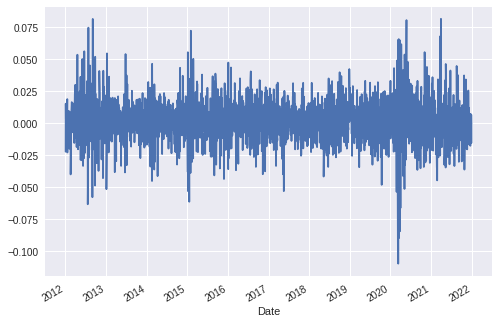

In [ ]:
retorno_carteira.plot() 

In [ ]:
retorno_acumulado = (1+retorno_carteira).cumprod() #retorno acumulado deste portfólio

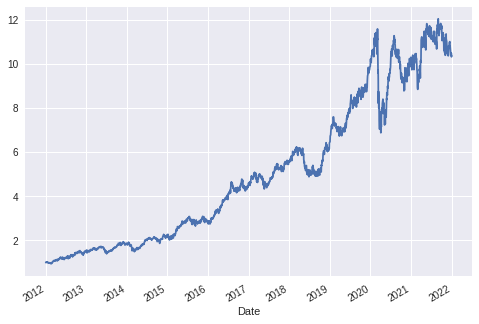

In [ ]:
retorno_acumulado.plot() #gráfico do retorno acumulado

#Para saber se uma carteira performou bem ou mal precisamos compará-la a um benchmark. Aqui utilizaremos o Ibovespa como índice de referência

In [ ]:
ibov=pd.DataFrame(yf.download("^BVSP",inicio,fim)["Adj Close"])

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.info() #checando possíveis dados faltantes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2470 entries, 2012-01-03 to 2021-12-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2470 non-null   float64
dtypes: float64(1)
memory usage: 38.6 KB


In [ ]:
ibov.head()

,Adj Close
Date,
2012-01-03,59265.0
2012-01-04,59365.0
2012-01-05,58546.0
2012-01-06,58600.0
2012-01-09,59083.0


In [ ]:
ibov_retornos=ibov.pct_change() 

In [ ]:
ibov_retorno_acumulado=(1+ibov_retornos).cumprod() #retorno acumulado

In [ ]:
ibov_retorno_acumulado.dropna(inplace=True)

In [ ]:
novo_df=pd.merge(pd.DataFrame(ibov_retorno_acumulado),pd.DataFrame(retorno_acumulado),how = "inner", on ="Date")
#juntado os DataFrames (retorno acumulado da carteira e retorno acumulado do IBOV)

In [ ]:
novo_df

,Adj Close,0
Date,,
2012-01-04,1.001687,0.992747
2012-01-05,0.987868,0.996165
2012-01-06,0.988779,0.999957
2012-01-09,0.996929,0.999993
2012-01-10,1.009128,0.998433
...,...,...
2021-12-23,1.769864,10.395511
2021-12-27,1.780663,10.467819
2021-12-28,1.769409,10.472231


In [ ]:
novo_df.rename(columns={"Adj Close":"IBOV" ,0:"Carteira"},inplace=True) #redefinindo o nome das colunas

In [ ]:
novo_df

,IBOV,Carteira
Date,,
2012-01-04,1.001687,0.992747
2012-01-05,0.987868,0.996165
2012-01-06,0.988779,0.999957
2012-01-09,0.996929,0.999993
2012-01-10,1.009128,0.998433
...,...,...
2021-12-23,1.769864,10.395511
2021-12-27,1.780663,10.467819
2021-12-28,1.769409,10.472231


#  No gráfico abaixo podemos perceber claramente que a carteira de melhor retorno gerou um desempenho muito melhor em relação ao índice ao longo destes 10 anos de comparação .

#  Mas e se escolhermos a carteira de menor retorno quais seriam os resultados?

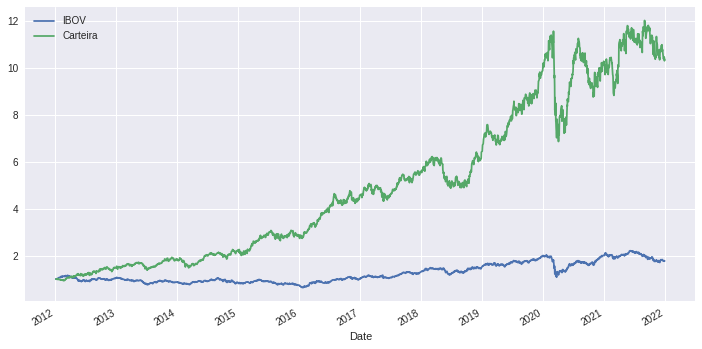

In [ ]:
novo_df.plot(figsize=(12,6))

 #   Basta repetirmos o procedimento feito anteriormete apenas mudando a linha que queremos analisar. No casoa  última linha trará o portfólio de menor retorno .

In [1027]:
retorno_min=df.iloc[199999:200000]

In [1028]:
retorno_min

,Retornos,Volatilidade,BBDC4.SApeso,ABEV3.SApeso,PETR4.SApeso,EQTL3.SApeso
199999,0.171714,0.353375,0.248561,0.157761,0.540771,0.052906


In [1029]:
retorno_min= retorno_min.drop(["Retornos","Volatilidade"],axis=1)

In [1030]:
pesos2=np.array(retorno_min)
pesos2

array([[0.24856138, 0.15776124, 0.54077121, 0.05290617]])

In [1031]:
retorno_carteira_min= retorno * pesos2

In [1032]:
retorno_carteira_min=retorno_carteira_min.sum(axis=1)

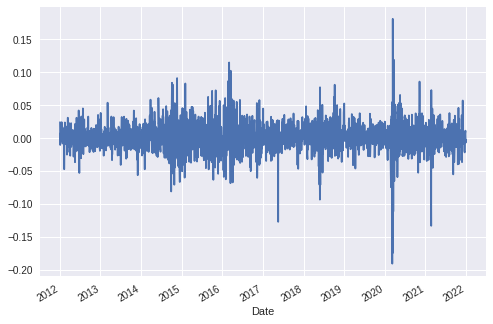

In [1033]:
retorno_carteira_min.plot()

In [1034]:
retorno_min_acumulado=(1+retorno_carteira_min).cumprod()

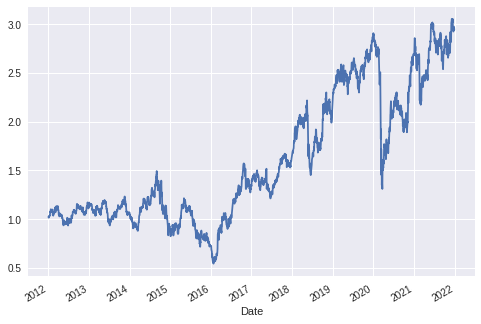

In [1035]:
retorno_min_acumulado.plot()

In [1036]:
novo_df2=pd.merge(pd.DataFrame(retorno_min_acumulado),pd.DataFrame(novo_df),how = "inner", on ="Date")

In [1037]:
novo_df2.rename(columns={0:"Carteira menor retorno"},inplace=True)

In [1038]:
novo_df2

,Carteira menor retorno,IBOV,Carteira
Date,,,
2012-01-04,1.025376,1.001687,0.992747
2012-01-05,1.014377,0.987868,0.996165
2012-01-06,1.017827,0.988779,0.999957
2012-01-09,1.025549,0.996929,0.999993
2012-01-10,1.031824,1.009128,0.998433
...,...,...,...
2021-12-23,2.940352,1.769864,10.395511
2021-12-27,2.972784,1.780663,10.467819
2021-12-28,2.971570,1.769409,10.472231


#  Os procedimentos da carteira de menor retorno são análogos ao procedimento da carteira de maior retorno e finalmente podemos análisar graficamente como foi dada essa simulação .


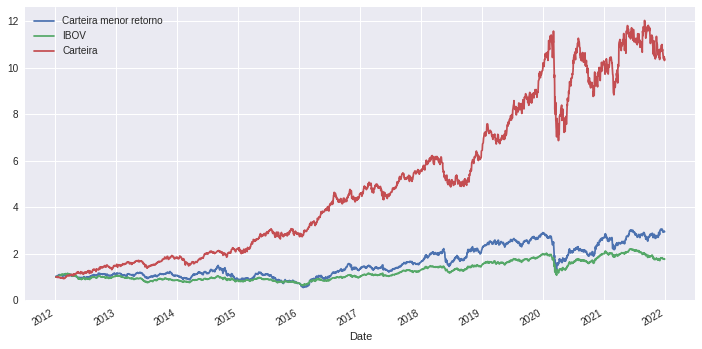

In [1039]:
novo_df2.plot(figsize=(12,6))

#  